# Network put together from google drive:

In [70]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/weather_forecast/')

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf


import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from random import randrange

In [0]:
from src.data.load_data import load_data, create_time_steps, prepare_dataset
from src.models.model import LSTMModel
from src.models.train import train
from src.models.predict import predict

def show_plot(history, true_future, prediction):
    plt.figure(figsize=(20, 10))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'b-o',
            label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'r-o',
                label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

In [0]:
data, TRAIN_SPLIT = load_data()

In [0]:
look_back = 336  # check last 14 days
prediction = 168  # predict next 7 days
STEP = 1

x_train, y_train, x_val, y_val = prepare_dataset(data, TRAIN_SPLIT, look_back, prediction, STEP)


In [0]:
lstm_model = LSTMModel(x_train.shape[-2:], prediction)

In [19]:
lstm_model = train(lstm_model,x_train,y_train,x_val,y_val,15,80)

Train on 6671 samples, validate on 1248 samples
Epoch 1/15
6640/6671 [============================>.] - ETA: 0s - loss: 0.6146
Epoch 00001: saving model to /content/drive/My Drive/weather_forecast/models/cp.ckpt
6671/6671 [==============================] - 40s 6ms/sample - loss: 0.6129 - val_loss: 0.5979
Epoch 2/15
6640/6671 [============================>.] - ETA: 0s - loss: 0.2323
Epoch 00002: saving model to /content/drive/My Drive/weather_forecast/models/cp.ckpt
6671/6671 [==============================] - 35s 5ms/sample - loss: 0.2322 - val_loss: 0.2560
Epoch 3/15
6640/6671 [============================>.] - ETA: 0s - loss: 0.2074
Epoch 00003: saving model to /content/drive/My Drive/weather_forecast/models/cp.ckpt
6671/6671 [==============================] - 34s 5ms/sample - loss: 0.2074 - val_loss: 0.2087
Epoch 4/15
6640/6671 [============================>.] - ETA: 0s - loss: 0.1280
Epoch 00004: saving model to /content/drive/My Drive/weather_forecast/models/cp.ckpt
6671/6671 [===

836


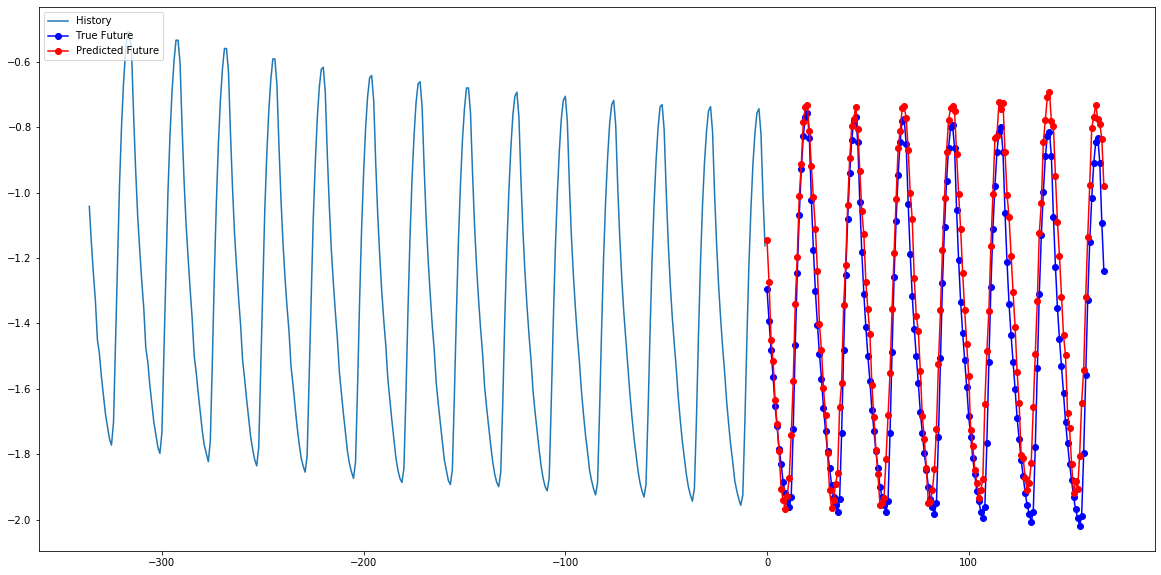

In [26]:
value = randrange(len(x_val))
print(value)
show_plot(x_val[value], y_val[value] , lstm_model.predict(x_val)[value])

In [0]:
latest = tf.train.latest_checkpoint('/content/drive/My Drive/weather_forecast/models')
model = LSTMModel(x_train.shape[-2:])

# Load the previously saved weights
model.load_weights(latest)

In [0]:
value = randrange(len(x_val))
print(value)
show_plot(x_val[value], y_val[value] , model.predict(x_val)[value])

In [0]:
lstm_model.save_weights('/content/drive/My Drive/saved_models/posledny')



# Restore the weights
# lstm_model.load_weights('./checkpoints/my_checkpoint')
